In [2]:
print("Hello world!")

Hello world!


In [3]:
from qiskit import __version__
print(__version__)

2.2.3


np.kron(A, B) computes the Kronecker (tensor) product of arrays A and B

In [4]:
import numpy as np
ket0 = np.array([[1], [0]])  #|0>
ket1 = np.array([[0], [1]])  #|1>
print(ket0 / 2 + ket1 / 2)
print(np.kron(ket0, ket1))  #|01>
print(np.size(ket0))

[[0.5]
 [0.5]]
[[0]
 [1]
 [0]
 [0]]
2


In [5]:
M1 = np.array([[1, 1], [0, 0]])
print(M1)
M2 = np.array([[1, 0], [0, 1]])
print(M2)
M = M1 / 2 + M2 / 2
print(M)

[[1 1]
 [0 0]]
[[1 0]
 [0 1]]
[[1.  0.5]
 [0.  0.5]]


In [6]:
print(f"{M1}* |1> =\n",np.matmul(M1, ket1)) # matrix-vector multiplication
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1 1]
 [0 0]]* |1> =
 [[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


### for pretty-printing (Output formatting)

In [7]:
from qiskit.visualization import array_to_latex  
display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Qiskit’s statevector representation of quantum states
Statevector: Represents a quantum state as a complex vector
sqrt: Used to normalize amplitudes.

In [8]:
from qiskit.quantum_info import Statevector  # functionality for defining and manipulating quantum state vectors
from numpy import sqrt
u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2/3])
w = Statevector([1/3, 2/3]) 
# not a valid quantum state unless normalized (sum of squared magnitudes = 1).

In [9]:
display(u.draw("text"))  # draw: displaying state vectors in a variety of ways (text, latex, latex_source, etc.)
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


In [10]:
display(u.is_valid())  # check if state vector is valid
display(v.is_valid())
display(w.is_valid())

True

True

False

In [11]:
display(v.draw("latex"))
outcome, state = v.measure()   # perform a measurement on the statevector
# (outcome of that measurement, new quantum state vector of the system after the measurement)
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))
print(state)

<IPython.core.display.Latex object>

Measured: 1
Post-measurement state:


<IPython.core.display.Latex object>

Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


{np.str_('0'): np.int64(554), np.str_('1'): np.int64(446)}


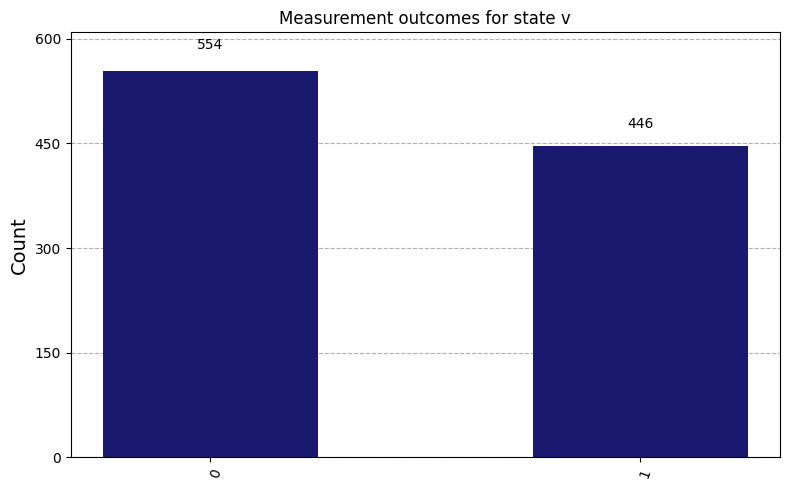

In [12]:
from qiskit.visualization import plot_histogram
stats = v.sample_counts(1000)
'''
.sample_counts(1000) simulates 1000 measurements of this quantum state in the computational basis
returns a dictionary with counts for each outcome
'''
print(stats)
plot_histogram(stats, title="Measurement outcomes for state v", figsize=(8, 5), color='midnightblue')

In [13]:
# functionality for defining and manipulating quantum operators (matrices)
from qiskit.quantum_info import Operator  

### Basis-changing gates (move the qubit on the Bloch sphere)

In [14]:
# Pauli Y, gate 180 deg rotation around the Y-axis
Y = Operator([[0, -1.0j], [1.0j, 0]])     

# Hadamard gate (superposition maker), 180 deg rotation around axis halfway between X and Z.
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])  

### Phase-only gates (rotate around Z and change relative phase)
 Interference -> Q.C. gets power

In [15]:
# S gate, 90 deg rotation around the Z-axis, only changes the relative phase.
S = Operator([[1, 0], [0, 1.0j]]) 

# T gate, 45 deg rotation around the Z-axis
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

Z = Operator([[1, 0], [0, -1]])

X = Operator([[0, 1],[1, 0]])
display(T.draw("latex"))
display(H.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [16]:
v = Statevector([1, 0])  # |0>
v = v.evolve(H)
display(v.draw("latex"))
display(v.evolve(H).draw("latex")) # Hadamard applied twice is identity
v = v.evolve(T)
display(v.draw("latex"))  #
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)
 
display(v.draw("latex")) 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Bloch Sphere Representation

Any single qubit state can be written as:
$$
|\psi \rangle = cos(\theta/2)|0⟩ + e^{iφ} sin(θ/2)|1⟩
$$
Its Bloch vector is:

x = sin($\theta$) cos($\psi$)
y = sin($\theta$) sin($\psi$)
z = cos($\theta$)

Every single-qubit unitary = rotation of this vector.


In [17]:
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
psi0 = Statevector([1, 0])
psi0.draw("latex")
psi_H = psi0.evolve(H)

print("State after H:")
display(psi_H.draw("latex"))

bloch_vec = psi_H.data
plot_bloch_vector([
    2*np.real(np.conj(bloch_vec[0])*bloch_vec[1]),
    2*np.imag(np.conj(bloch_vec[1])*bloch_vec[0]),
    np.abs(bloch_vec[0])**2 - np.abs(bloch_vec[1])**2
])
plt.show()


State after H:


<IPython.core.display.Latex object>

In [18]:
psi_HT = psi_H.evolve(T)

print("State after H then T:")
display(psi_HT.draw("latex"))

bloch_vec = psi_HT.data
plot_bloch_vector([
    2*np.real(np.conj(bloch_vec[0])*bloch_vec[1]),
    2*np.imag(np.conj(bloch_vec[1])*bloch_vec[0]),
    np.abs(bloch_vec[0])**2 - np.abs(bloch_vec[1])**2
])
plt.show()
HZH = H @ Z @ H

print("HZH equals X?")
print(np.allclose(HZH.data, X.data))

State after H then T:


<IPython.core.display.Latex object>

HZH equals X?
True


### Key Identity

H Z H = X

Meaning:

- Z rotations can become X rotations
- So if we have small Z rotations (like T),
- Then H T H behaves like a small X rotation

Having:
- small Z rotations
- small X rotations

We can build any single-qubit rotation.

That is why {H, T} is universal.

In [19]:
psi = psi_H

for i in range(4):
    psi = psi.evolve(T)

display(psi.draw("latex"))

<IPython.core.display.Latex object>

## Quantum Circuits

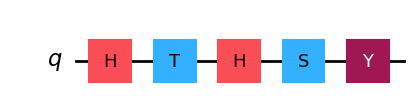

In [20]:
from qiskit import QuantumCircuit 
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)
 
display(circuit.draw(output="mpl"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

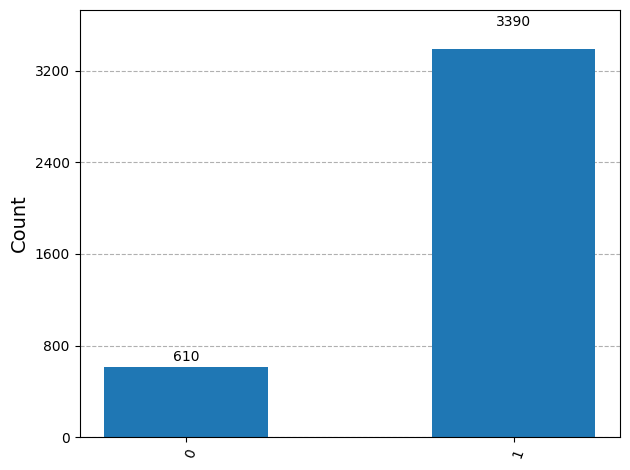

In [21]:
display(Operator.from_circuit(circuit).draw("latex"))  # display the operator implemented by the circuit
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))

Rotations around: X-axis, Z-axis are enough to generate any 3D rotation (SO(3) group theory).